## Samikshhya_Gurung(2417750)

### Problem 1 - Data Read, Write and Inspect:

#### 1. Load the provided dataset and import in pandas DataFrame.

In [1]:

import pandas as pd
try:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/bank .csv')
  print("Dataset loaded successfully!")
except FileNotFoundError:
  print("Error: '/content/drive/MyDrive/Datasets/bank .csv' not found. Please upload the file or provide the correct path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!


####  2. Check info of the DataFrame and identify following:
#### (a) columns with dtypes=object
#### (b) unique values of those columns.
#### (c) check for the total number of null values in each column

In [2]:

import pandas as pd

# (a) Columns with dtypes=object
object_columns = df.select_dtypes(include=['object']).columns

# (b) Unique values of those columns
for col in object_columns:
  print(f"Unique values in column '{col}': {df[col].unique()}")

# (c) Total number of null values in each column
null_counts = df.isnull().sum()
print("\nTotal null values in each column:\n", null_counts)


Unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in column 'y': ['no' 'yes']

Total null values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pda

#### 3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”

In [3]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.to_csv('banknumericdata.csv', index=False)
print('\nNumeric DataFrame saved to banknumericdata.csv')


Numeric DataFrame saved to banknumericdata.csv


#### 4. Read ”banknumericdata.csv” and Find the summary statistics.

In [4]:
import pandas as pd

try:
  data = pd.read_csv('banknumericdata.csv')
  print(data.describe())
except FileNotFoundError:
  print("Error: 'banknumericdata.csv' not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

### Problem 2- Data Imputations:

#### 1. Load the provided dataset and import in pandas DataFrame.

In [5]:
import pandas as pd

try:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/medical_students_dataset.csv')
  print("Dataset loaded successfully.")
except FileNotFoundError:
  print("Error: '/content/drive/MyDrive/Datasets/medical_students_dataset.csv' not found. Please check the file path.")
except pd.errors.EmptyDataError:
  print("Error: '/content/drive/MyDrive/Datasets/medical_students_dataset.csv' is empty.")
except pd.errors.ParserError:
  print("Error: Could not parse '/content/drive/MyDrive/Datasets/medical_students_dataset.csv'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.


#### # 2. Check info of the DataFrame and identify column with missing (null) values.

In [6]:
import pandas as pd

df.info()

# data = {'col1': [1, 2, None, 4], 'col2': [5, 6, 7, 8]}
# df = pd.DataFrame(data)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


#### 3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.

In [7]:
import pandas as pd
import numpy as np

def fill_missing_values(df):
    """
    Fills missing values in a Pandas DataFrame using various techniques.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing values filled.
    """

    # Make a copy to avoid modifying the original DataFrame
    filled_df = df.copy()

    for col in filled_df.columns:
        if filled_df[col].isnull().any():  # Check if column has missing values
            print(f"Filling missing values for column '{col}'")

            # Strategy 1: Numerical Columns - Mean/Median imputation
            if pd.api.types.is_numeric_dtype(filled_df[col]):
                if filled_df[col].skew() > 0.5:  # Right Skew: Median is better
                    median_val = filled_df[col].median()
                    filled_df[col].fillna(median_val, inplace=True)
                    print(f"Used median ({median_val}) due to positive skewness.")
                else: # Mean for less skewed or normally distributed
                    mean_val = filled_df[col].mean()
                    filled_df[col].fillna(mean_val, inplace=True)
                    print(f"Used mean ({mean_val}) due to low skewness.")

            # Strategy 2: Categorical Columns - Mode imputation
            elif pd.api.types.is_categorical_dtype(filled_df[col]) or pd.api.types.is_object_dtype(filled_df[col]):
                mode_val = filled_df[col].mode()[0]  # Get the most frequent value
                filled_df[col].fillna(mode_val, inplace=True)
                print(f"Used mode ({mode_val}) for categorical column.")

            # Strategy 3:  For datetime columns - Forward fill
            elif pd.api.types.is_datetime64_any_dtype(filled_df[col]):
              filled_df[col].fillna(method='ffill',inplace=True)
              print("Used forward fill for datetime column")

    return filled_df

# Assuming 'data' is your DataFrame
# filled_data = fill_missing_values(data)

# Now 'filled_data' contains the DataFrame with filled missing values.

#### 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [8]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
  print(f"There are {duplicate_rows} duplicate rows in the dataset.")

  dataset = df.drop_duplicates()
  print("Duplicate rows removed.")

  print(f"Dataset shape after removing duplicates: {df.shape}")
else:
  print("No duplicate rows found in the dataset.")

There are 7644 duplicate rows in the dataset.
Duplicate rows removed.
Dataset shape after removing duplicates: (200000, 13)


###  3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:


#### Problem-1
 Create a DataFrame that is subsetted for the columns ’Name’, ’Class’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [13]:
import pandas as pd

try:
    titanic_dataset_df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_dataset.csv')
except FileNotFoundError:
    print("Error: 'titanic.csv' not found. Please make sure the file is in the current directory or provide the correct path.")
    exit()

subset_df = titanic_dataset_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]

fare_stats = first_class_df['Fare'].agg(['mean', 'median', 'max', 'min'])

fare_stats

,Fare
mean,84.154687
median,60.287500
max,512.329200
min,0.000000


#### Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [14]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_dataset.csv')

null_count = df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_count}")

# Drop rows with null values in the 'Age' column
df = df.dropna(subset=['Age'])

# Print the DataFrame to verify the changes
df

Number of null values in 'Age' column: 177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### # Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for SouthamptonThe ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [15]:
import pandas as pd

# 1. One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# 2. Add the new columns to the DataFrame
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

# 3. Drop the original 'Embarked' column
titanic_df = titanic_df.drop('Embarked', axis=1)

# 4. Print the first few rows
print(titanic_df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


#### # Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


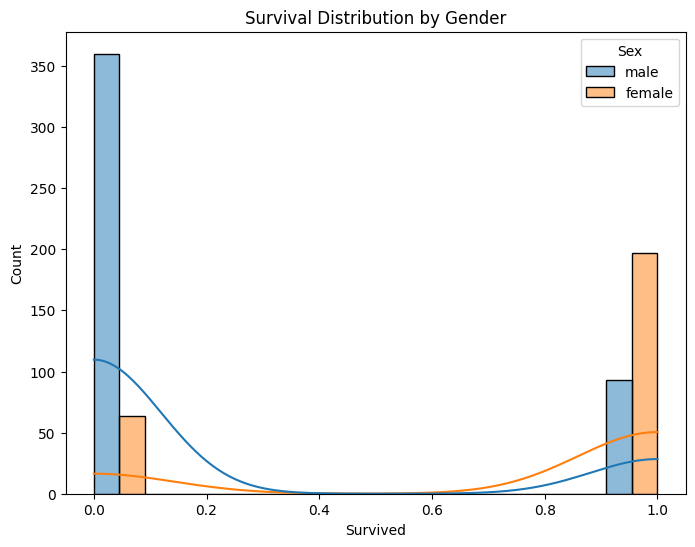

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Survived', hue='Sex', kde=True, multiple="dodge")
plt.title('Survival Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#### # Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

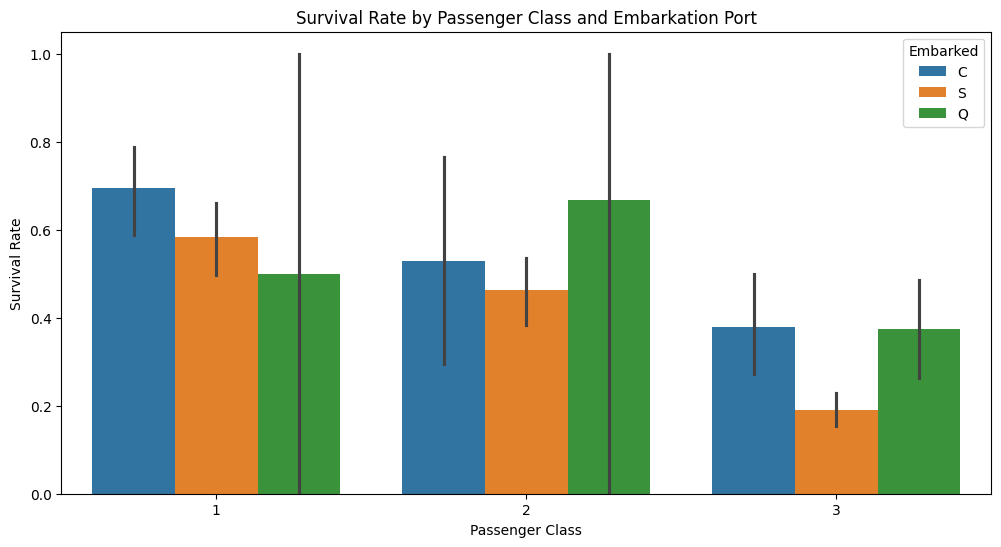

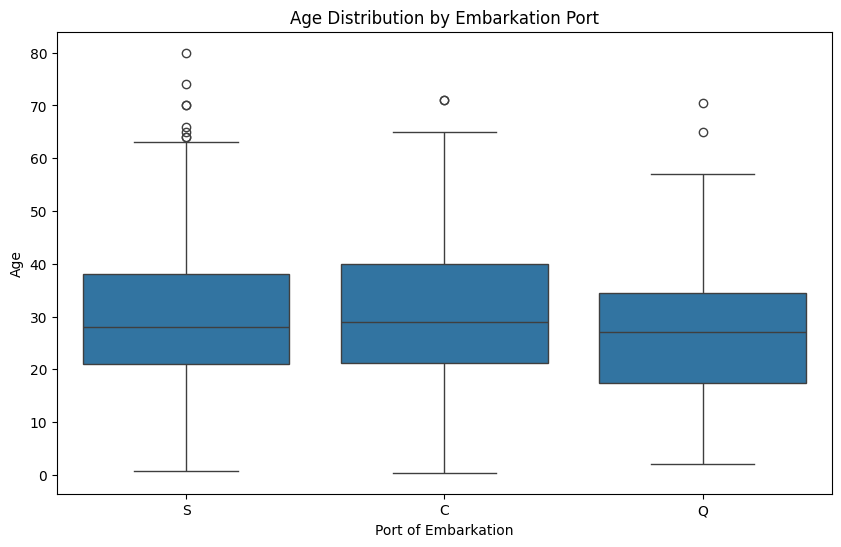

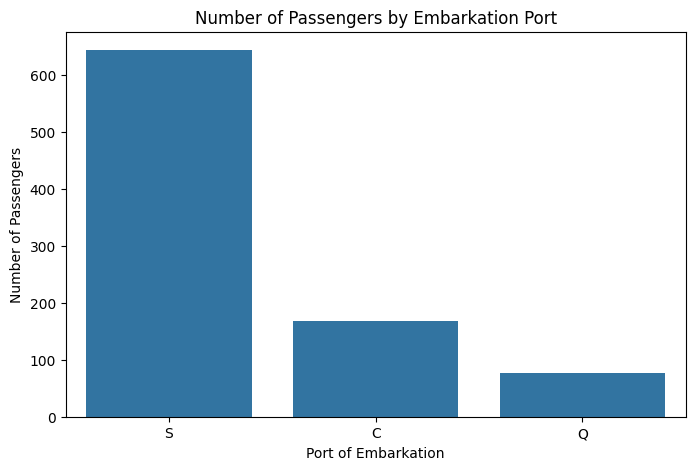

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    titanic_data = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_dataset.csv')
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found. Please make sure the file is in the correct location.")
    exit()


# Create the visualization, breaking it down by port of embarkation
plt.figure(figsize=(12, 6))

sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=titanic_data)
plt.title('Survival Rate by Passenger Class and Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Alternative visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Age', data=titanic_data)
plt.title('Age Distribution by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Age')
plt.show()

# Another visualization option
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic_data)
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.show()